# Header test

In [ ]:
# install pre-req's
!python -m pip install git+https://github.com/EPFL-LCN/neuronaldynamics-exercises
# had installed wrong version, so just to be safe
!python pip uninstall brian2
!python -m pip install -I brian2==2.3

/usr/local/lib/python3.7/dist-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  "Distutils was imported before Setuptools, but importing Setuptools "
/usr/local/lib/python3.7/dist-packages/_distutils_hack/__init__.py:30: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


nr of spikes: 0


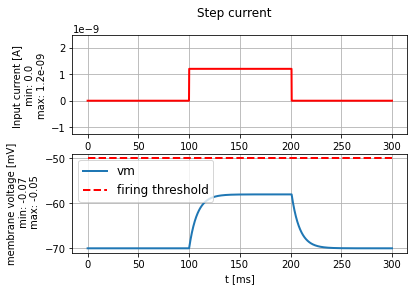

nr of spikes: 5


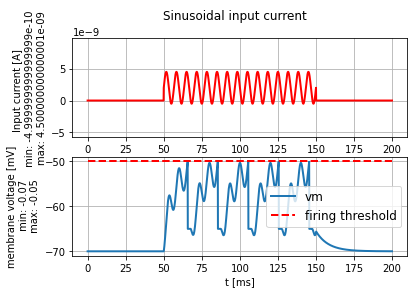

Resting potential: -0.07
Reset voltage: -0.065
Firing threshold: -0.05
Membrane resistance: 10000000.0
Membrane time-scale: 0.008
Absolute refractory period: 0.002


In [2]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.leaky_integrate_and_fire import LIF
from neurodynex3.tools import input_factory, plot_tools

LIF.getting_started()
LIF.print_default_parameters()

V_REST = -70*b2.mV
V_RESET = -65*b2.mV
FIRING_THRESHOLD = -50*b2.mV
MEMBRANE_RESISTANCE = 10. * b2.Mohm
MEMBRANE_TIME_SCALE = 8. * b2.ms
ABSOLUTE_REFRACTORY_PERIOD = 2.0 * b2.ms

### 1.1. Exercise: minimal current
In the absence of an input current, a LIF neuron has a constant membrane voltage V_REST. If an input current drives vm above the firing threshold, a spike is generated. Then, vm is reset to V_RESET and the neuron ignores any input during the refractroy period.

#### 1.1.1. Question: minimal current (calculation)
For the default neuron parameters (see above), compute the minimal amplitude Imin of a step current to elicitate a spike. You can access the default values in your code and do the calculation with correct units:

In [3]:
from neurodynex3.leaky_integrate_and_fire import LIF
print("resting potential: {}".format(LIF.V_REST))

resting potential: -0.07


####1.1.2. Question: minimal current (simulation)
Use the value Imin you’ve computed and verify your result: inject a step current of amplitude Imin for 100ms into the LIF neuron and plot the membrane voltage. vm should approach the firing threshold but not fire. We have implemented a couple of helper functions to solve this task. Use this code block, but make sure you understand it and you’ve read the docs of the functions LIF.simulate_LIF_neuron(), input_factory.get_step_current() and plot_tools.plot_voltage_and_current_traces().

In [ ]:
import brian2 as b2
from neurodynex3.leaky_integrate_and_fire import LIF
from neurodynex3.tools import input_factory

# create a step current with amplitude = I_min
step_current = input_factory.get_step_current(
    t_start=5, t_end=100, unit_time=b2.ms,
    amplitude=I_min)  # set I_min to your value

# run the LIF model.
# Note: As we do not specify any model parameters, the simulation runs with the default values
(state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time = 100 * b2.ms)

# plot I and vm
plot_tools.plot_voltage_and_current_traces(
state_monitor, step_current, title="min input", firing_threshold=LIF.FIRING_THRESHOLD)
print("nr of spikes: {}".format(spike_monitor.count[0]))  # should be 0

###1.2. Exercise: f-I Curve
For a constant input current I, a LIF neuron fires regularly with firing frequency f. If the current is to small (I<Imin) f is 0Hz; for larger I the rate increases. A neuron’s firing-rate versus input-amplitude relationship is visualized in an “f-I curve”.

####1.2.1. Question: f-I Curve and refractoryness
We now study the f-I curve for a neuron with a refractory period of 3ms (see LIF.simulate_LIF_neuron() to learn how to set a refractory period).

Sketch the f-I curve you expect to see.
What is the maximum rate at which this neuron can fire?
Inject currents of different amplitudes (from 0nA to 100nA) into a LIF neuron. For each current, run the simulation for 500ms and determine the firing frequency in Hz. Then plot the f-I curve. Pay attention to the low input current.

###1.3. Exercise: “Experimentally” estimate the parameters of a LIF neuron
A LIF neuron is determined by the following parameters: Resting potential, reset voltage, firing threshold, membrane resistance, membrane time-scale, absolute refractory period. By injecting a known test current into a LIF neuron (with unknown parameters), you can determine the neuron properties from the voltage response.

####1.3.1. Question: “Read” the LIF parameters out of the vm plot
Get a random parameter set.
Create an input current of your choice.
Simulate the LIF neuron using the random parameters and your test-current. Note that the simulation runs for a fixed duration of 50ms.
Plot the membrane voltage and estimate the parameters. You do not have to write code to analyse the voltage data in the StateMonitor. Simply estimate the values from the plot. For the membrane resistance and the membrane time-scale you might have to change your current.
Compare your estimates with the true values.
Again, you do not have to write much code. Use the helper functions:

In [ ]:
# get a random parameter. provide a random seed to have a reproducible experiment
random_parameters = LIF.get_random_param_set(random_seed=432)

# define your test current
test_current = input_factory.get_step_current(
    t_start=..., t_end=..., unit_time=b2.ms, amplitude= ... * b2.namp)

# probe the neuron. pass the test current AND the random params to the function
state_monitor, spike_monitor = LIF.simulate_random_neuron(test_current, random_parameters)

# plot
plot_tools.plot_voltage_and_current_traces(state_monitor, test_current, title="experiment")

# print the parameters to the console and compare with your estimates
# LIF.print_obfuscated_parameters(random_parameters)

###1.4. Exercise: Sinusoidal input current and subthreshold response
In the subthreshold regime (no spike), the LIF neuron is a linear system and the membrane voltage is a filtered version of the input current. In this exercise we study the properties of this linear system when it gets a sinusoidal stimulus.

####1.4.1. Question
Create a sinusoidal input current (see example below) and inject it into the LIF neuron. Determine the phase and amplitude of the membrane voltage.

In [ ]:
# note the higher resolution when discretizing the sine wave: we specify unit_time=0.1 * b2.ms
sinusoidal_current = input_factory.get_sinusoidal_current(200, 1000, unit_time=0.1 * b2.ms,
                                            amplitude= 2.5 * b2.namp, frequency=250*b2.Hz,
                                            direct_current=0. * b2.namp)

# run the LIF model. By setting the firing threshold to to a high value, we make sure to stay in the linear (non spiking) regime.
(state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=sinusoidal_current, simulation_time = 120 * b2.ms, firing_threshold=0*b2.mV)

# plot the membrane voltage
plot_tools.plot_voltage_and_current_traces(state_monitor, sinusoidal_current, title="Sinusoidal input current")
print("nr of spikes: {}".format(spike_monitor.count[0]))

####1.4.2. Question
For input frequencies between 10Hz and 1 kHz, plot the resulting amplitude of subthreshold oscillations of the membrane potential vs. input frequency.

####1.4.3. Question
For input frequencies between 10Hz and 1 kHz, plot the resulting phase shift of subthreshold oscillations of the membrane potential vs. input frequency. 

Note: It is not straight forward to automatically determine the phase shift in a script. For this exercise, simply get it “visually” from your plot. If you want to automatize the procedure in your Python script you could try the function scipy.signal.correlate().

####1.4.4. Question
To what type of filter (High-Pass, Low-Pass) does this correspond to?